## Project Introduction
#### Stroke Analysis and Predictions: Project Introduction

Strokes are one of the leading causes of death and long-term disability worldwide, making it crucial to understand the factors that contribute to their occurrence. This project focuses on analyzing stroke-related data to identify patterns and develop predictive models that can help in early detection and prevention. By leveraging historical health data, such as demographic information, lifestyle factors, medical history, and other relevant variables, the goal is to build machine learning models capable of predicting the likelihood of a stroke.

The project will explore various algorithms, including logistic regression, decision trees, and neural networks, to create a robust predictive system. Alongside predictions, data visualization techniques will be used to provide insights into key risk factors, such as age, hypertension, and smoking habits, helping healthcare providers and individuals take proactive measures. This research aims to contribute towards improved healthcare decision-making and personalized stroke prevention strategies.

##### Context
* According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
* This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

##### Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
##### Note: "Unknown" in smoking_status means that the information is unavailable for this patient

##### Acknowledgements
* (Confidential Source) - Use only for educational purposes
* If you use this dataset in your research, please credit the author.

###### Project Workflow
* Importation of Libraries
* Loading of the dataset
* Data cleaning
* Exploratory Data Analysis (EDA)
* Predictive Analysis
* Conclusion

######  Importation of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

######  Loading of the dataset

In [2]:
raw = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\healthcare-dataset-stroke-data.csv')

In [3]:
raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###### Creating checkpoint to preserve the originality of the dataset

In [4]:
data = raw.copy()

In [5]:
data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


###### Data Cleaning

###### Shape

In [6]:
shape_df = data.shape
print("Number of Columns:",shape_df[1])
print("Number of Rows:",shape_df[0])

Number of Columns: 12
Number of Rows: 5110


###### Data types

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

###### Observation:
All Columns have their correct data types except the age column which will be corrected

###### Columns

In [8]:
#view columns
data.columns.values

array(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'], dtype=object)

In [9]:
#capitalize the first alphabet of each column
data.columns = data.columns.str.capitalize()

In [10]:
#confirm changes
data.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_disease', 'Ever_married',
       'Work_type', 'Residence_type', 'Avg_glucose_level', 'Bmi',
       'Smoking_status', 'Stroke'],
      dtype='object')

In [11]:
data.head(2)

,Id,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


###### Dataset Information

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 5110 non-null   int64  
 1   Gender             5110 non-null   object 
 2   Age                5110 non-null   float64
 3   Hypertension       5110 non-null   int64  
 4   Heart_disease      5110 non-null   int64  
 5   Ever_married       5110 non-null   object 
 6   Work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   Avg_glucose_level  5110 non-null   float64
 9   Bmi                4909 non-null   float64
 10  Smoking_status     5110 non-null   object 
 11  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###### Observation:
* All column names are correct
* All data types are correct
* There are missing values in the dataset

######  Missing values

In [13]:
data.isnull().sum()

Id                     0
Gender                 0
Age                    0
Hypertension           0
Heart_disease          0
Ever_married           0
Work_type              0
Residence_type         0
Avg_glucose_level      0
Bmi                  201
Smoking_status         0
Stroke                 0
dtype: int64

###### Observation 
* There are so many missing values in the BMI column which happens to be the only column with missing values.
* But we cannot drop the whole column (BMI) which is a very vital factor in the prediction of stroke.
* So, I'm going to fill it with the mean or median values even though this will alter the authenticity of our analysis and prediction

<Axes: xlabel='Bmi', ylabel='Density'>

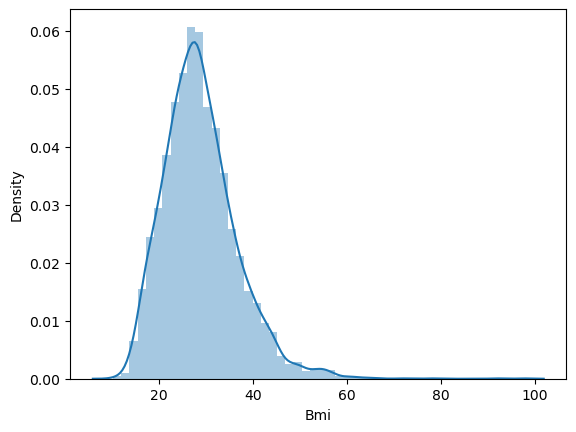

In [14]:
#checking for normality in the BMI column
sns.distplot(data['Bmi'])

* The Bmi column is normal , so, i will fill the missing values iwth the mean values

In [15]:
# mean values

data['Bmi'] = data['Bmi'].fillna(data['Bmi'].mean())

In [16]:
data.isnull().sum()

Id                   0
Gender               0
Age                  0
Hypertension         0
Heart_disease        0
Ever_married         0
Work_type            0
Residence_type       0
Avg_glucose_level    0
Bmi                  0
Smoking_status       0
Stroke               0
dtype: int64

* Missing values filled with the mean values

###### Univariate Analysis  -  Columns_wise Exploration - Categorical columns

In [17]:
data['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
data['Age'].dtype

dtype('float64')

###### Observation
* The age column does not have a correct data

In [19]:
# correcting
data['Age'] = data['Age'].astype(int)

In [20]:
data['Age'].dtype

dtype('int32')

In [21]:
#Hypertension
data['Hypertension'].unique()

array([0, 1], dtype=int64)

In [22]:
#heart disease
data['Heart_disease'].unique()

array([1, 0], dtype=int64)

In [23]:
data['Ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
# work_type

data['Work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [25]:
# residence type

data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [26]:
# Average_clucose_level
data['Avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [27]:
#Smoking Status
data['Smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [28]:
#stroke
data['Stroke'].unique()

array([1, 0], dtype=int64)

###### Observation
* All columns are inspected and set for the exploratory data analysis(eda)

###### Exploratory Data Analysis

###### Insights from the categorical columns

In [29]:
data.dtypes

Id                     int64
Gender                object
Age                    int32
Hypertension           int64
Heart_disease          int64
Ever_married          object
Work_type             object
Residence_type        object
Avg_glucose_level    float64
Bmi                  float64
Smoking_status        object
Stroke                 int64
dtype: object

######  Gender

In [30]:
gender_count = data['Gender'].value_counts().to_frame()
gender_count

,count
Gender,
Female,2994
Male,2115
Other,1


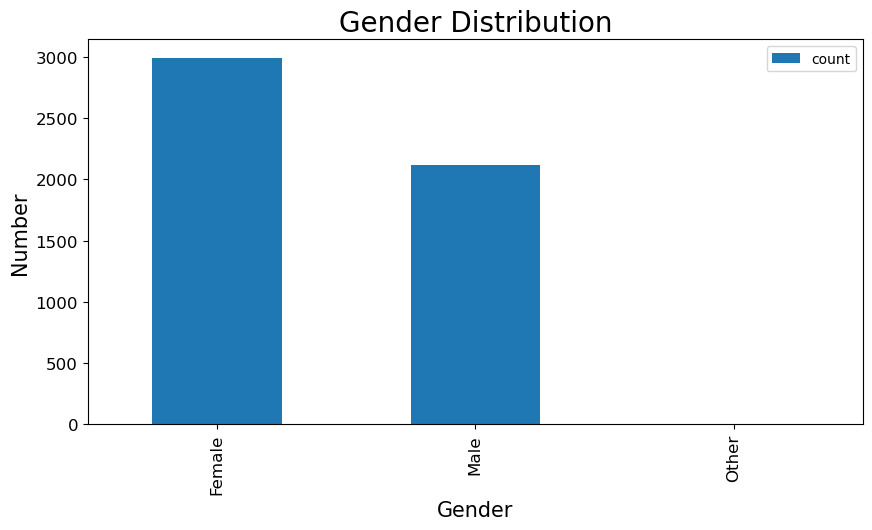

In [31]:
gender_count.plot(kind = 'bar',figsize = (10,5), fontsize = 12)
plt.title('Gender Distribution',size = 20)
plt.xlabel('Gender',size = 15)
plt.ylabel('Number',size = 15)
plt.show()

###### Observation
* There are more females than males in the dataset

##### Ever married

In [32]:
married_count = data['Ever_married'].value_counts().to_frame()
married_count

,count
Ever_married,
Yes,3353
No,1757


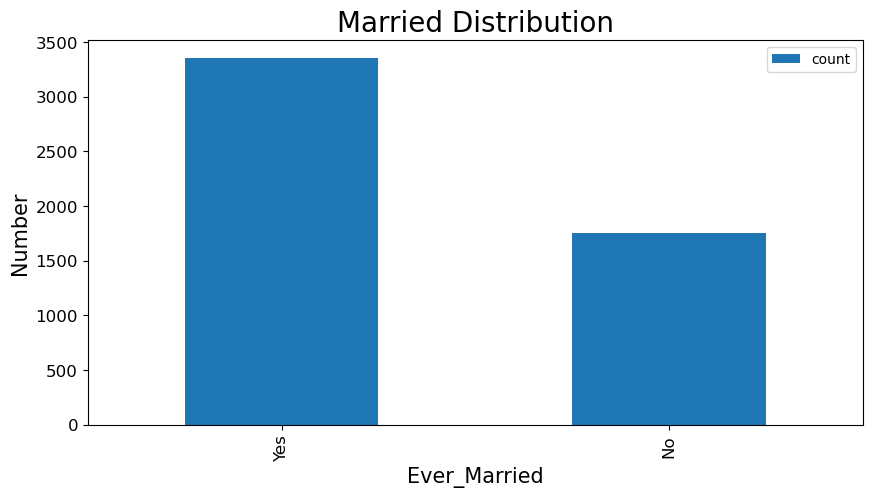

In [33]:
#visualizing
married_count.plot(kind = 'bar',figsize = (10,5), fontsize = 12)
plt.title('Married Distribution',size = 20)
plt.xlabel('Ever_Married',size = 15)
plt.ylabel('Number',size = 15)
plt.show()

######  Observation
* They are more married people than umarried people

###### Work type 

In [34]:
 data['Work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [35]:
work_type_count = data['Work_type'].value_counts().to_frame()
work_type_count

,count
Work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


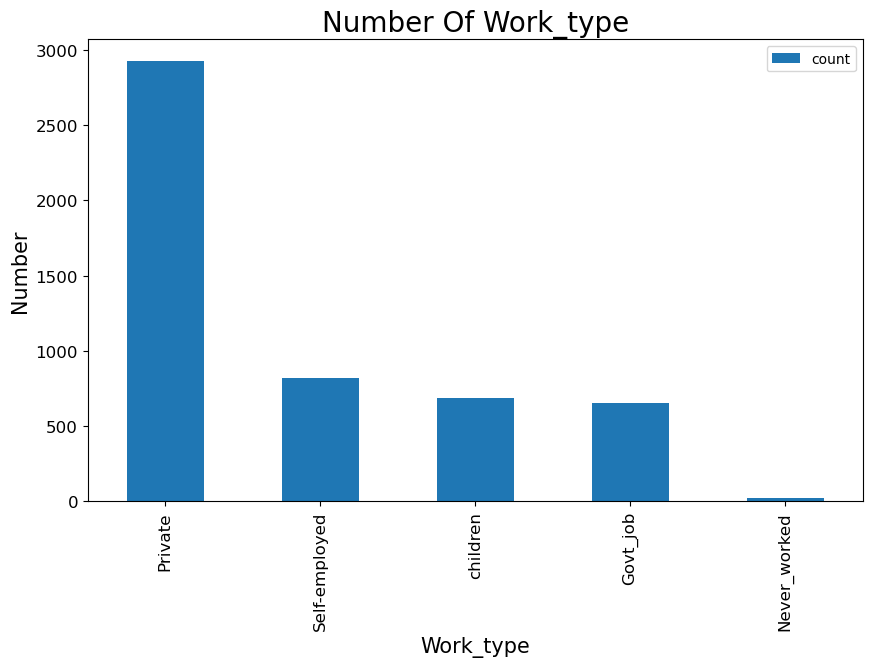

In [36]:
work_type_count.plot(kind='bar',figsize = (10,6),fontsize = 12)
plt.title('Number Of Work_type',size = 20)
plt.xlabel('Work_type',size = 15)
plt.ylabel('Number',size = 15)
plt.show()

###### Observation
* The private workers were more in number than other types of workers

###### Residence Type

In [37]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [38]:
resi_count = data['Residence_type'].value_counts().to_frame().T
resi_count

Residence_type,Urban,Rural
count,2596,2514


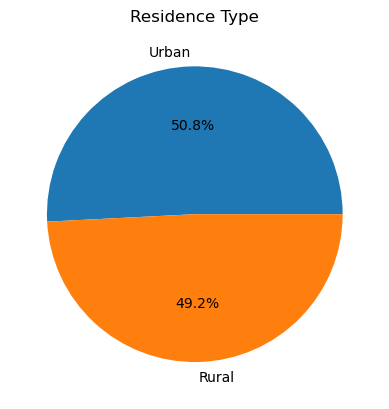

In [39]:
#visualization with Pie chart
data['Residence_type'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Residence Type')
plt.ylabel('')
plt.show()

###### Observation
* The Urban area has more people than the rural area

######  Smoking status

In [40]:
data['Smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [41]:
smoking_count = data['Smoking_status'].value_counts().to_frame()
smoking_count

,count
Smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


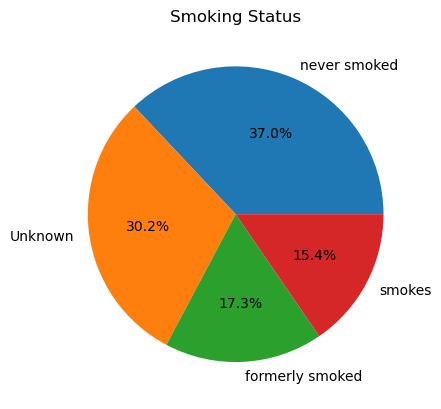

In [42]:
#visualization with pie chart
data['Smoking_status'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Smoking Status')
plt.ylabel('')
plt.show()

######  Observation
* Never smoked has the highest number of people. This means that they were more number of people who never smoked than others.

######  Descriptive Statistics

In [43]:
#numerical only
data.describe()

,Id,Age,Hypertension,Heart_disease,Avg_glucose_level,Bmi,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Bivariate Analysis - Numerical Vs Numerical

######  Correlational Analysis

In [44]:
data_corr = data[['Age','Hypertension','Heart_disease','Avg_glucose_level','Bmi','Stroke']].corr()

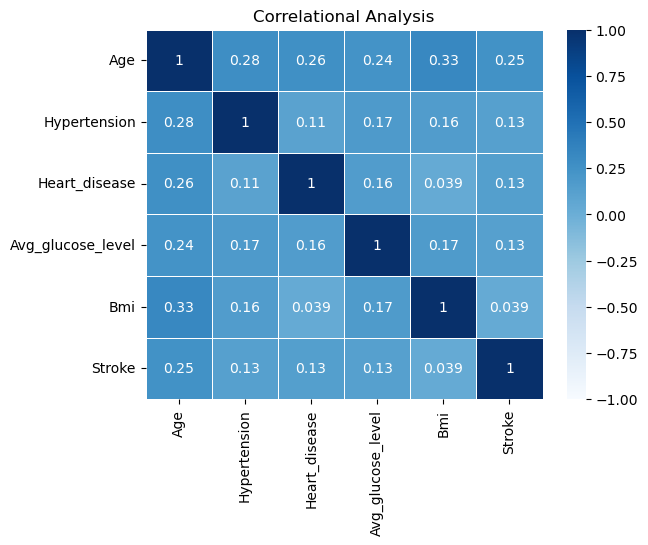

In [45]:
sns.heatmap(data_corr, vmax = 1, vmin = -1,annot= True, cmap = 'Blues', linewidths = 0.5)
plt.title('Correlational Analysis')
plt.show()

###### Interpretation
* 1 - This depicts that there is a perfect correlation.
* 0.1-0.4 - This mean that there is a low positive correlation between varables. here the impact of column over another is positively low.
* -0.1 - -o.4 - This mean that there is a low negative correlation between varables. here the impact of column over another is negatively low .
* 0.5 - 0.9 - This imply that there is high positive relationship between variables, indicating that the impact of one column over another is highly positive.
* -0.5 - -0.9 - This imply that there is high positive relationship between variables, indicating that the impact of one column over another is highly positive.


######  Regressional Analysis - Impact on stroke

######  Age Vs Stroke

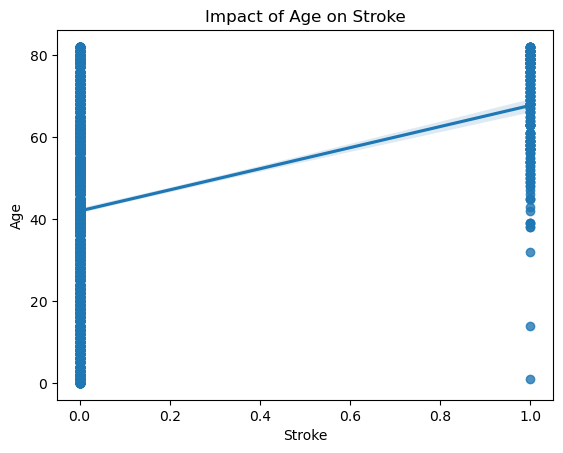

In [47]:
sns.regplot(x = 'Stroke',y='Age', data = data)
plt.title('Impact of Age on Stroke')
plt.show()

######  Observation 
* The higher the age, the higher the chances of getting stroke.

###### Bmi And Stroke

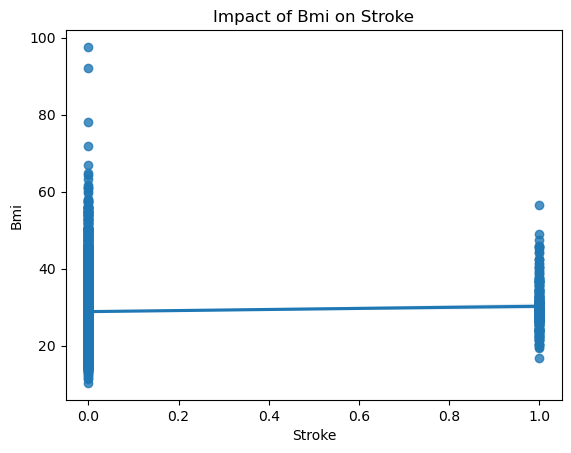

In [48]:
sns.regplot(x = 'Stroke',y = 'Bmi', data = data)
plt.title('Impact of Bmi on Stroke')
plt.show()

######  Observation
* Bmi has a very small positive  impact on stroke. Increase in Bmi may only result to a very small increase in Stroke

###### Avg_glucose_level Vs Stroke

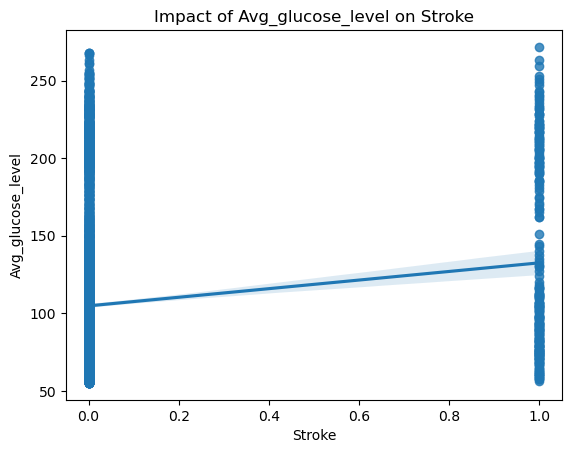

In [50]:
sns.regplot(x = 'Stroke',y = 'Avg_glucose_level', data = data)
plt.title('Impact of Avg_glucose_level on Stroke')
plt.show()

###### Observation
* Increase in glucose level result to increase in Stroke

######  Heart_disease Vs Stroke

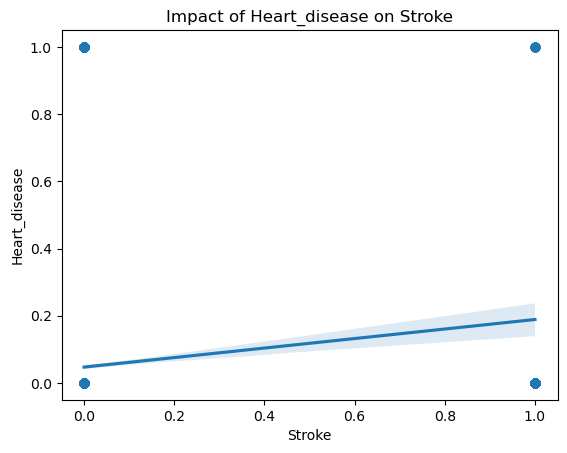

In [51]:
sns.regplot(x = 'Stroke', y = 'Heart_disease', data = data)
plt.title('Impact of Heart_disease on Stroke')
plt.show()

###### Observation
* Presence of Heart Disease results to increase in Stroke

###### Hypertension Vs Stroke

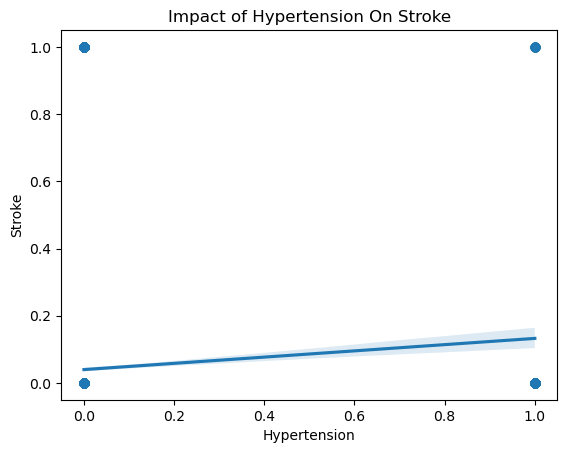

In [52]:
sns.regplot(x = 'Hypertension', y = 'Stroke', data = data)
plt.title('Impact of Hypertension On Stroke')
plt.show()

######  Observation
* Increase in Hypertension will result to increase in Stroke

######  Categorical columns Vs Numerical - Stroke

###### Point Of View
* In this part, we are going to explore the effect of categorical column on stroke

######  Gender Vs Stroke

In [55]:
gender_stroke = data.groupby('Gender')['Stroke'].sum().to_frame()
gender_stroke

,Stroke
Gender,
Female,141
Male,108
Other,0


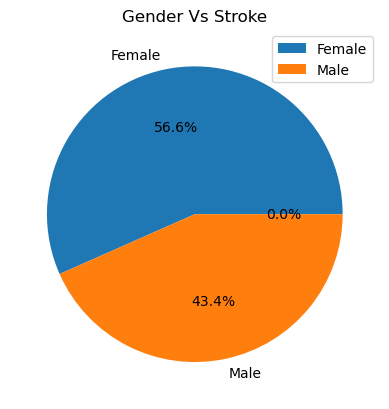

In [58]:
gender_stroke.plot.pie(autopct = '%1.1f%%', subplots = True)
plt.title('Gender Vs Stroke')
plt.ylabel('')
plt.show()

###### Observation
* A higher number or percentage of female suffered from stroke than male

###### Ever Married Vs Stroke

In [59]:
ever_stroke = data.groupby('Ever_married')['Stroke'].sum().to_frame()
ever_stroke

,Stroke
Ever_married,
No,29
Yes,220


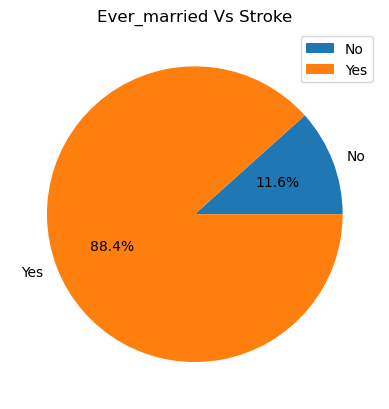

In [60]:
ever_stroke.plot.pie(autopct = '%1.1f%%', subplots = True)
plt.title('Ever_married Vs Stroke')
plt.ylabel('')
plt.show()

###### Observation
* married people suffered more from stroke than unmarried people

###### Work Type Vs Stroke 

In [61]:
work_stroke = data.groupby('Work_type')['Stroke'].sum().to_frame()
work_stroke

,Stroke
Work_type,
Govt_job,33
Never_worked,0
Private,149
Self-employed,65
children,2


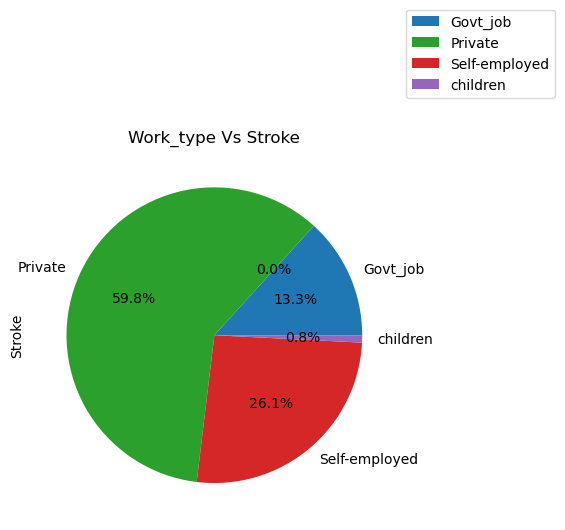

In [76]:
work_stroke.plot.pie(autopct = '%1.1f%%', subplots = True)
plt.title('Work_type Vs Stroke')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1.4))
plt.show()

######  Observation
* More private workers has stroke than other workers

######  Residence Type Vs Stroke


In [73]:
residence_stroke = data.groupby('Residence_type')['Stroke'].sum().to_frame()
residence_stroke

,Stroke
Residence_type,
Rural,114
Urban,135


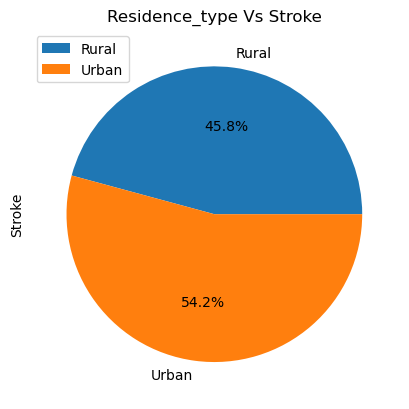

In [75]:
residence_stroke.plot.pie(autopct = '%1.1f%%', subplots = True)
plt.title('Residence_type Vs Stroke')
plt.legend(loc = 'upper left')
plt.show()

###### Observation
* More urban residents in the urban region has stroke higher than the rural residents

######  Smoking Status Vs Stroke

In [78]:
smokers_stroke = data.groupby('Smoking_status')['Stroke'].sum().to_frame()
smokers_stroke

,Stroke
Smoking_status,
Unknown,47
formerly smoked,70
never smoked,90
smokes,42


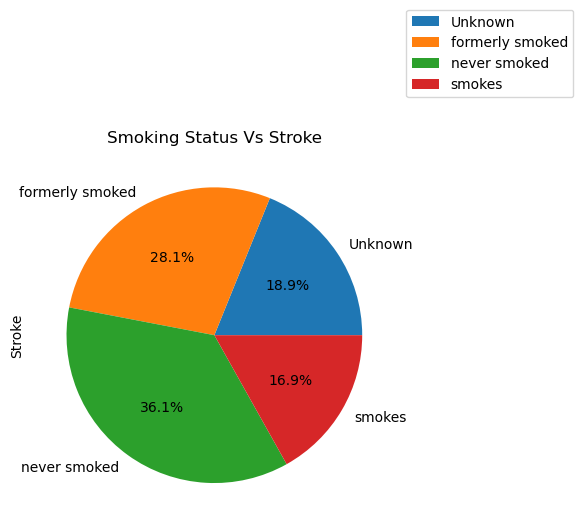

In [79]:
smokers_stroke.plot.pie(autopct = '%1.1f%%', subplots = True)
plt.title('Smoking Status Vs Stroke')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1.4))
plt.show()

######  Observation
* They are more cases of stroke with people who never smoked than others 

### Predictive  Analysis 

In [80]:
data.head()

,Id,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


###### Creating a checkpoint

In [116]:
pre_df = data.copy()

In [117]:
pre_df.head(2)

,Id,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


In [119]:
pre_df.tail(2)

,Id,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


######  Preprocessing

In [120]:
#drop the ID column
pre_df = pre_df.drop('Id', axis = 1)

###### Using mapping to deal with categorical variables


In [96]:
data['Work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [121]:
#Gender
pre_df['Gender'] = pre_df['Gender'].map({'Male':1, 'Female':2,'Unknown':0})

#Ever_married
pre_df['Ever_married'] = pre_df['Ever_married'].map({'Yes':1, 'No':0})

#Work_type
pre_df['Work_type'] = pre_df['Work_type'].map({'Private':1, 'Self-employed':2, 'Govt_job':3, 'children':4,'Never_worked':5})
#Residence_type

pre_df['Residence_type'] = pre_df['Residence_type'].map({'Urban':1, 'Rural':0})
#Smoking_status

pre_df['Smoking_status'] = pre_df['Smoking_status'].map({'formerly smoked':1, 'never smoked':0,'smokes':2, 'Unknown':3})

In [122]:
#view head to confirm changes
pre_df.head()

,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,1.0,67,0,1,1,1,1,228.69,36.600000,1,1
1,2.0,61,0,0,1,2,0,202.21,28.893237,0,1
2,1.0,80,0,1,1,1,0,105.92,32.500000,0,1
3,2.0,49,0,0,1,1,1,171.23,34.400000,2,1
4,2.0,79,1,0,1,2,0,174.12,24.000000,0,1


In [126]:
#checking for null valuse
pre_df[pre_df.Gender.isnull()]

,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
3116,NaN,26,0,0,0,1,0,143.33,22.4,1,0


In [129]:
#replacing null values
pre_df.Gender.fillna(0, inplace = True)

In [130]:
#changing data type
pre_df['Gender'] = pre_df['Gender'].astype('int')

In [131]:

pre_df.head()

,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,1,67,0,1,1,1,1,228.69,36.600000,1,1
1,2,61,0,0,1,2,0,202.21,28.893237,0,1
2,1,80,0,1,1,1,0,105.92,32.500000,0,1
3,2,49,0,0,1,1,1,171.23,34.400000,2,1
4,2,79,1,0,1,2,0,174.12,24.000000,0,1


###### Standardization

In [132]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [133]:
#initialize the scaler
scaler = StandardScaler()

In [135]:
scaler = StandardScaler()
#transforming the column
pre_df[['Gender','Age', 'Hypertension', 'Heart_disease', 'Ever_married', 'Work_type', 'Residence_type', 'Avg_glucose_level', 'Bmi', 'Smoking_status']] = scaler.fit_transform(pre_df[['Gender','Age', 'Hypertension', 'Heart_disease', 'Ever_married', 'Work_type', 'Residence_type', 'Avg_glucose_level', 'Bmi', 'Smoking_status']])

In [136]:
pre_df.head()

,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,-1.188073,1.050950,-0.328602,4.185032,0.723884,-0.749127,0.984080,2.706375,1.001234e+00,-0.308806,1
1,0.840344,0.785835,-0.328602,-0.238947,0.723884,0.144857,-1.016178,2.121559,4.615554e-16,-1.103767,1
2,-1.188073,1.625367,-0.328602,4.185032,0.723884,-0.749127,-1.016178,-0.005028,4.685773e-01,-1.103767,1
3,0.840344,0.255604,-0.328602,-0.238947,0.723884,-0.749127,0.984080,1.437358,7.154182e-01,0.486155,1
4,0.840344,1.581181,3.043196,-0.238947,0.723884,0.144857,-1.016178,1.501184,-6.357112e-01,-1.103767,1


###### Handling Imbalance Data

In [138]:
Target = pre_df['Stroke'].value_counts()
Target

Stroke
0    4861
1     249
Name: count, dtype: int64

###### Observation
* The data is not balanced


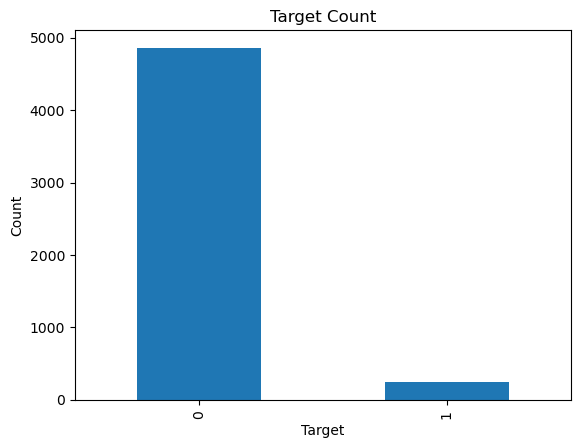

In [140]:
Target.plot(kind='bar')
plt.title('Target Count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

###### Using Oversampling

In [141]:
x = pre_df.drop(['Stroke'],axis=1)
y = pre_df['Stroke']

In [142]:
x.head()

,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status
0,-1.188073,1.050950,-0.328602,4.185032,0.723884,-0.749127,0.984080,2.706375,1.001234e+00,-0.308806
1,0.840344,0.785835,-0.328602,-0.238947,0.723884,0.144857,-1.016178,2.121559,4.615554e-16,-1.103767
2,-1.188073,1.625367,-0.328602,4.185032,0.723884,-0.749127,-1.016178,-0.005028,4.685773e-01,-1.103767
3,0.840344,0.255604,-0.328602,-0.238947,0.723884,-0.749127,0.984080,1.437358,7.154182e-01,0.486155
4,0.840344,1.581181,3.043196,-0.238947,0.723884,0.144857,-1.016178,1.501184,-6.357112e-01,-1.103767


In [143]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Stroke, dtype: int64

In [144]:
#using smote
from imblearn.over_sampling import SMOTE


In [147]:
x_res.shape

(9722, 10)

In [148]:
y_res.shape

(9722,)

In [149]:
y_res.value_counts()

Stroke
1    4861
0    4861
Name: count, dtype: int64

* Imbalanced data resolved

######  Data Splitting

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=42)

###### Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

###### Model Evaluation

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [153]:
y_pred1 = log.predict(x_test)

In [154]:
accuracy_score(y_test,y_pred1)

0.7820051413881748

In [155]:
precision_score(y_test,y_pred1)

0.7570621468926554

In [156]:
recall_score(y_test,y_pred1)

0.8288659793814434

In [157]:
f1_score(y_test,y_pred1)

0.7913385826771654

######  Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [159]:
y_pred2 = dt.predict(x_test)

In [160]:
accuracy_score(y_test,y_pred2)

0.9151670951156813

In [161]:
precision_score(y_test,y_pred2)

0.9069767441860465

In [162]:
recall_score(y_test,y_pred2)

0.9247422680412372

In [163]:
f1_score(y_test,y_pred2)

0.9157733537519143

######  Visualization

In [164]:
final_data = pd.DataFrame({'Models':['LR','DT'],
             "ACC":[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                   ]})
final_data

,Models,ACC
0,LR,78.200514
1,DT,91.516710


In [166]:
final_data_prec = pd.DataFrame({'Models':['LR','DT'],
             "PRE":[precision_score(y_test,y_pred1)*100,
                    precision_score(y_test,y_pred2)*100,
                   ]})
final_data_prec

,Models,PRE
0,LR,75.706215
1,DT,90.697674


In [167]:
final_data_re = pd.DataFrame({'Models':['LR','DT'],
             "Recall":[recall_score(y_test,y_pred1)*100,
                    recall_score(y_test,y_pred2)*100,
                   ]})
final_data_re

,Models,Recall
0,LR,82.886598
1,DT,92.474227


In [168]:
final_data_F1 = pd.DataFrame({'Models':['LR','DT'],
             "F1":[f1_score(y_test,y_pred1)*100,
                    f1_score(y_test,y_pred2)*100,
                   ]})
final_data_F1

,Models,F1
0,LR,79.133858
1,DT,91.577335


###### Obsevation
* The DecisionTreeClassifier perform best and so i am going to drop the logistic regression model and further with the DecisionTreeClassfier

###### using DecisionTreeClassifier

In [169]:
#training in the whole dataset
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

###### Save The model

In [170]:
#Import library
import joblib

In [171]:
#save the model
joblib.dump(DT,'Stroke detector')

['Stroke detector']

In [172]:
model = joblib.load('Stroke detector')

In [173]:
prediction = model.predict([[1,1,0,0,0,0,1,1,1,0]])

In [174]:
if prediction==0:
    print("No Stroke")
else:
        print("Presence Of stroke")

Presence Of stroke


In [ ]:
from tkinter import *
import joblib


def show_entry_fields():
    Gender=float(e1.get())
    Age=float(e2.get())
    Hypertension=float(e3.get())
    Heart_disease=float(e4.get())
    Ever_married=float(e5.get())
    
    Work_type=float(e6.get())
    Residence_type=float(e7.get())
    Avg_glucose_level=float(e8.get())
    Bmi=float(e9.get())
    Smoking_status=float(e10.get())
    
    model = joblib.load('Stroke detector')
    y_pred = model.predict([[Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status]])
    
    list1  = [Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status]
    
    result = []
    if y_pred ==0:
        result.append("No Stroke")
    else:
        result.append("Presence Of Stroke")
    print("") 
    print("Stroke Detection System",result)
    print("")
    
    Label(master,text="Final Prediction From The Model-Stroke Detection System")
    Label(master,text=result).grid(row=12)
    
master = Tk()
master.title("Stroke Disease Detection System")

label = Label(master,text='Stroke Disease Detection System'
             , bg = 'black',fg='white', width = 30).grid(row=12)

Label(master,text='Enter value of Gender').grid(row=1)
Label(master,text='Enter value of Age').grid(row=2)
Label(master,text='Enter value of Hypertension').grid(row=3)
Label(master,text='Enter value of Heart_disease').grid(row=4)
Label(master,text='Enter value of Ever_married').grid(row=5)

Label(master,text='Enter value of Work_type').grid(row=6)
Label(master,text='Enter value of Residence_type').grid(row=7)
Label(master,text='Enter value of Avg_glucose_level').grid(row=8)
Label(master,text='Enter value of Bmi').grid(row=9)
Label(master,text='Enter value of Smoking_status').grid(row=10)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)

e1.grid(row = 1,column = 1)
e2.grid(row = 2,column = 1)
e3.grid(row = 3,column = 1)
e4.grid(row = 4,column = 1)
e5.grid(row = 5,column = 1)
e6.grid(row = 6,column = 1)

e7.grid(row = 7,column = 1)
e8.grid(row = 8,column = 1)
e9.grid(row = 9,column = 1)
e10.grid(row = 10,column = 1)

Button(master,text = "Predict",command = show_entry_fields).grid()

mainloop()



Stroke Detection System ['Presence Of Stroke']


Stroke Detection System ['Presence Of Stroke']


Stroke Detection System ['No Stroke']

